In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
path=r'D:\tens\kraggle\huose price\train.csv'
df_train = pd.read_csv(path)

In [2]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#数据分布，房价最高755，000，最低34，900，平均180，921
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


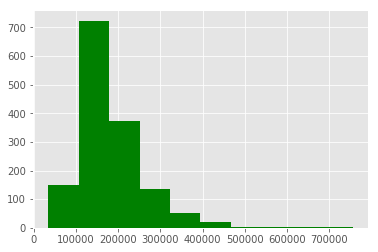

In [4]:
#通过柱状图查看房价分布，主要分布在100,000到250,000的范围，分布不是正态分布偏向前半部分
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(df_train.SalePrice,color='green')
plt.show()

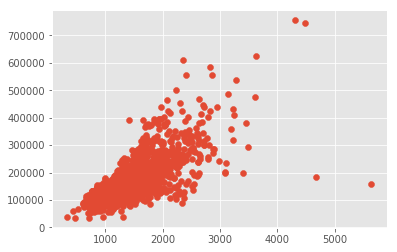

In [5]:
#一般而言房价和面积，楼层，地理位置相关
#首先查看面价和售价的关系，有两个点偏离的比较远
plt.scatter(x=df_train['GrLivArea'],y=df_train['SalePrice'])
plt.show()

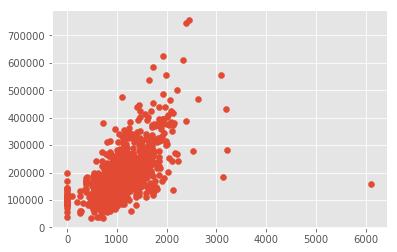

In [6]:
#地基面积和售价的关系
plt.scatter(x=df_train['TotalBsmtSF'],y=df_train['SalePrice'])
plt.show()

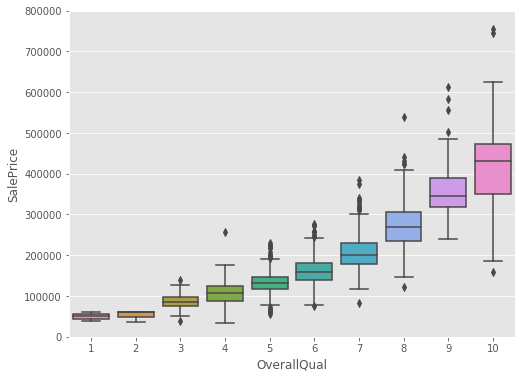

In [7]:
#装修质量和房价关系
import seaborn as sns
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.show()

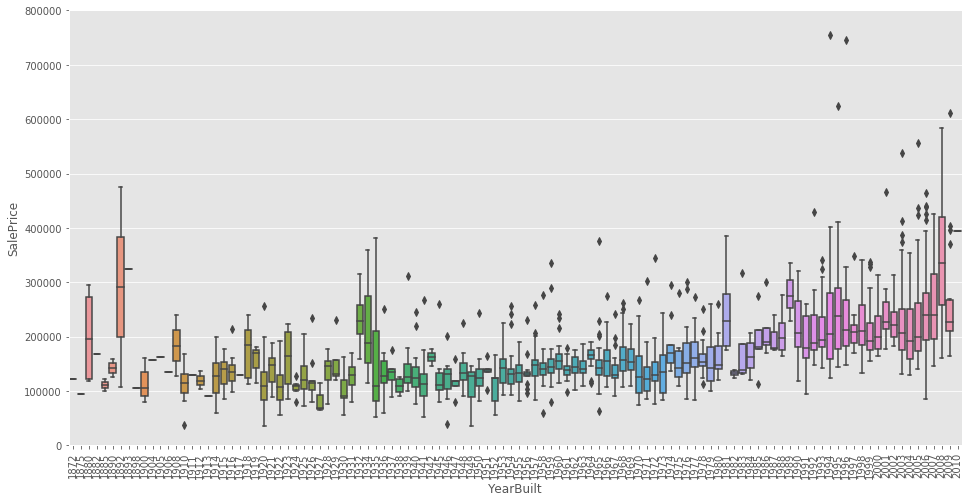

In [8]:
#住房年限和房价关系
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);plt.xticks(rotation=90);
plt.show()

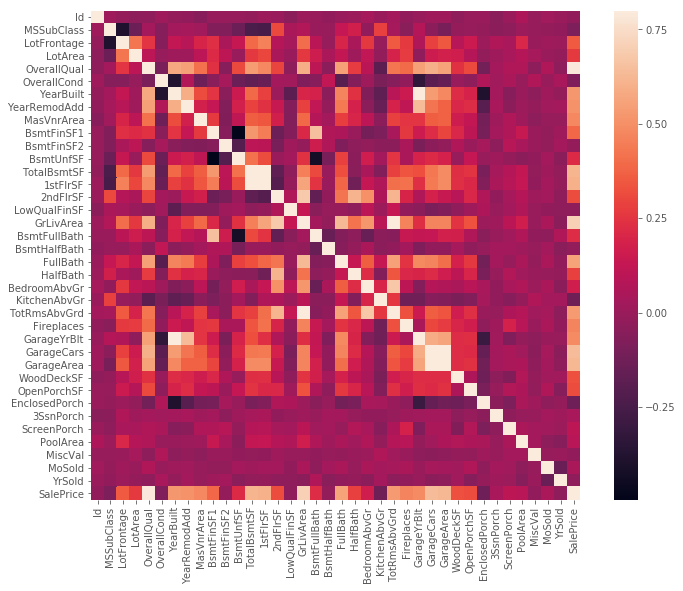

In [9]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

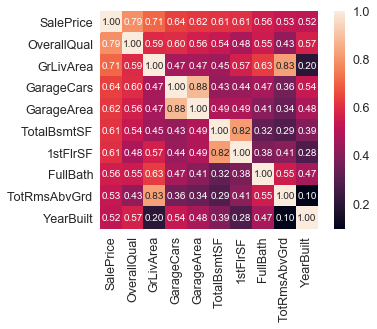

In [10]:
#相关系数最大的10个特征
k=10
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

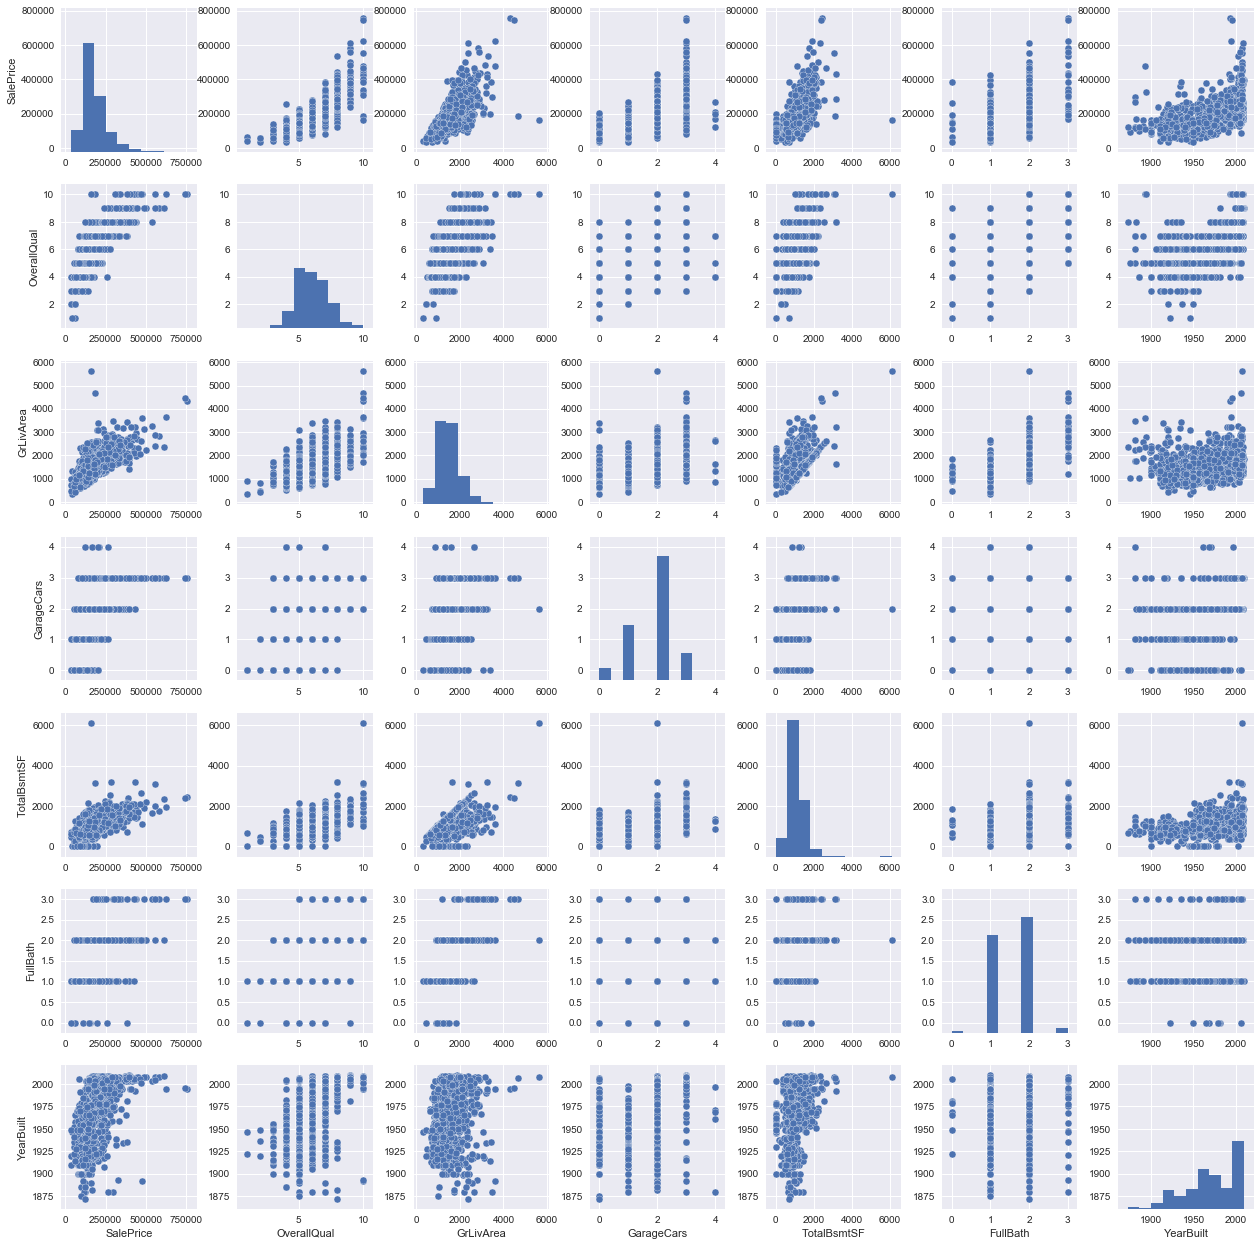

In [11]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols],size=2.5)
plt.show()

In [12]:
#显示缺失数据最多的20个特征
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [13]:
#显示
df_train= df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train= df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [14]:
#将售价去均值和方差归一化
import sklearn.preprocessing  as pre 
saleprice_scaled= pre.StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


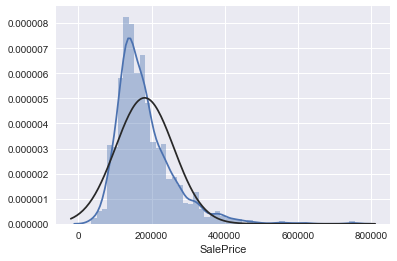

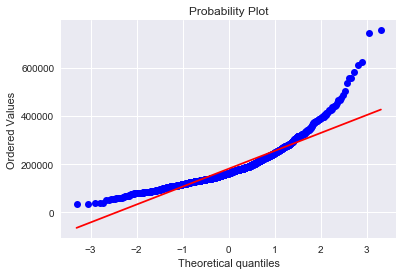

In [15]:
#从散点图可以看出来数据jiejin接近对数分布
import scipy.stats as stats
sns.distplot(df_train['SalePrice'],fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

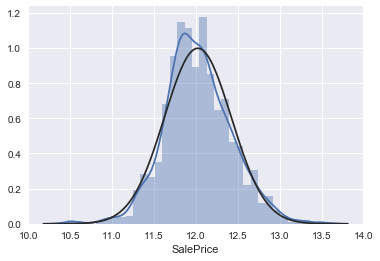

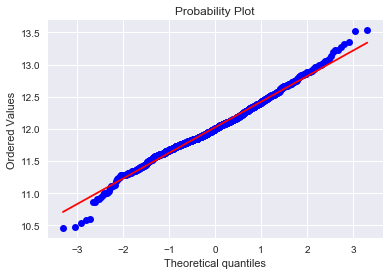

In [16]:
#对房价取对数之后数据基本服从正态分布
df_train['SalePrice']= np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [39]:
path=r'D:\tens\kraggle\huose price\train.csv'
path2=r'D:\tens\kraggle\huose price\test.csv'
train_df = pd.read_csv(path,index_col = 0)
test_df = pd.read_csv(path2, index_col =0)
y_train = np.log(train_df.pop('SalePrice'))
all_df  =  pd.concat((train_df,test_df),axis = 0)
all_df.shape

#把category的变量转变成numerical表达形式
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)
all_df['MSSubClass'].value_counts()
pd.get_dummies(all_df['MSSubClass'],prefix = 'MSSubClass')
all_dummy_df = pd.get_dummies(all_df)  
all_dummy_df.head()
#填充平均值
mean_cols = all_dummy_df.mean()
all_dummy_df = all_dummy_df.fillna(mean_cols) 
all_dummy_df.isnull().sum().sum()


0

In [40]:
#把category的变量转变成numerical表达形式
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)
all_df['MSSubClass'].value_counts()
pd.get_dummies(all_df['MSSubClass'],prefix = 'MSSubClass')
all_dummy_df = pd.get_dummies(all_df)  
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [41]:
#填充平均值
mean_cols = all_dummy_df.mean()
all_dummy_df = all_dummy_df.fillna(mean_cols) 
all_dummy_df.isnull().sum().sum()

0

In [42]:
numeric_cols = all_df.columns[all_df.dtypes != 'object'] 
numeric_col_means = all_dummy_df.loc[:,numeric_cols].mean() 
numeric_col_std = all_dummy_df.loc[:,numeric_cols].std()  #标准差
all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[:,numeric_cols] - numeric_col_means) / numeric_col_std

In [43]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]
dummy_train_df.shape,dummy_test_df.shape
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score  #交叉验证来测试模型

X_train = dummy_train_df.values
X_test =  dummy_test_df.values


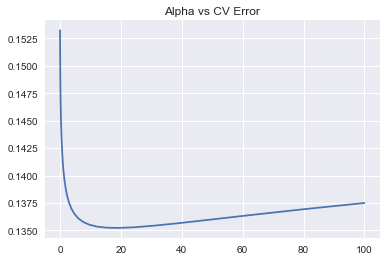

In [45]:
#用Sklearn自带的cross_calidation来测试模型
alphas = np.logspace(-3,2,50) #创建等比数列，如：10^-3至10^2其中的50个数
test_scores = []  #交叉验证的得分
for alpha in alphas:
    clf = Ridge(alpha)  
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv = 10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(alphas,test_scores)  #可视化参数与分数
plt.title('Alpha vs CV Error')
plt.show()

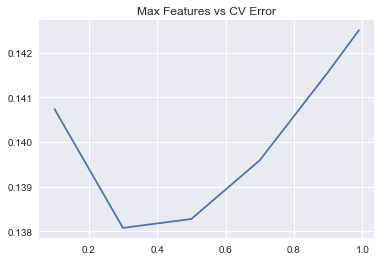

In [47]:
from sklearn.ensemble import RandomForestRegressor
max_features = [.1,.3,.5,.7,.9,.99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators = 200,max_features = max_feat)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv = 5,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(max_features,test_scores)
plt.title('Max Features vs CV Error')
plt.show()

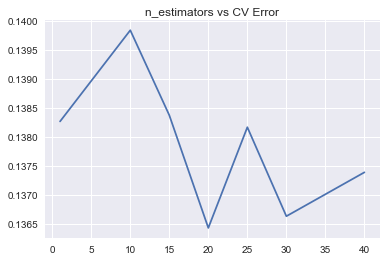

In [64]:
from sklearn.ensemble import BaggingRegressor
ridge = Ridge(alpha = 15)
# bagging 把很多小的分类器放在一起，每个train随机的一部分数据，然后把它们的最终结果综合起来（多数投票）  
# bagging 算是一种算法框架  
params = [1, 10, 15, 20, 25, 30, 40]  # 多少个弱分类器  
test_scores = []  
for param in params:
    clf = BaggingRegressor(base_estimator = ridge, n_estimators=param)  
    #base_estimator = ridge是弱分类器0.132（params=25时）  
    #clf = BaggingRegressor(n_estimators = param)#用Bagging自带的DecisionTree，最好0.140  
    test_score =  np.sqrt(-cross_val_score(clf,X_train,y_train,cv = 5,scoring = 'neg_mean_squared_error')) 
    test_scores.append(np.mean(test_score))  
plt.plot(params, test_scores)  
plt.title('n_estimators vs CV Error')  
plt.show()  
  
br = BaggingRegressor(base_estimator=ridge, n_estimators=25)  
br.fit(X_train, y_train)  
y_final = np.expm1(br.predict(X_test))

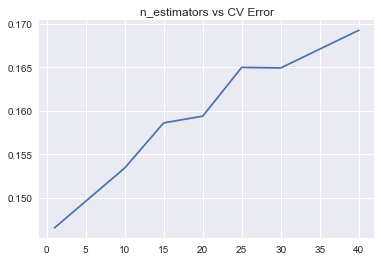

In [65]:
from sklearn.ensemble import AdaBoostRegressor  
ms = [10,15,20,25,30,35,40,45,50]  
test_scores = []  
for param in params:  
    clf = AdaBoostRegressor(base_estimator = ridge,n_estimators = param) #ms=25时，0.132，但是不稳定，需要更多的参数或者更多小分类器  
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv = 10,scoring = 'neg_mean_squared_error'))  
    test_scores.append(np.mean(test_score))  
plt.plot(params,test_scores)  
plt.title('n_estimators vs CV Error')  
plt.show()

In [ ]:
from xgboost import XGBRegressor
params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth = param)  #深度params=5时，错误率达到0.127
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv = 10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params,test_scores)
plt.title('max_depth vs CV Error')
plt.show()

xgb = XGBRegressor(max_depth = 5)
xgb.fit(X_train, y_train)
y_final = np.expm1(xgb.predict(X_test))

In [66]:
ridge = Ridge(alpha = 15)
rf = RandomForestRegressor(n_estimators = 500,max_features = .3)
ridge.fit(X_train,y_train)
rf.fit(X_train,y_train)

#最前面个label做了一个log(1+x),这里需要把predit的值给exp回去，并且戒掉那个‘1’
y_ridge = np.expm1(ridge.predict(X_test))
y_rf = np.expm1(rf.predict(X_test))
#把所有的model的预测结果作为新的输入，最简单的就是不下直接【平均化】
y_final = (y_ridge + y_rf) / 2

In [67]:
submission_df = pd.DataFrame(data = {'Id':test_df.index,'SalePrice':y_final})
print submission_df.head(10)
submission_df.to_csv('r'D:\tens\kraggle\huose price\submission.csv',columns = ['Id','SalePrice'],index = False)

SyntaxError: invalid syntax (<ipython-input-67-b0a8a0f9bc70>, line 2)